In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/CS506Project_smallbusiness/20220516-MainStreet_BusinessList.csv')
df

,...1,latitude,longitude,business_name,street_address,zip,NAICS_2017_6digit_code,NAICS_2017_6digit_desc,NAICS_2017_2digit_code,NAICS_2017_2digit_desc,estimated_employment,employment_buckets,mainstreet
0,1,42.349398,-71.154065,zisis convenience store,375 Washington St,2135,452319,All Other General Merchandise Stores,45,Retail Trade,1.0,1 to 9,Brighton
1,2,42.350387,-71.165135,ziggy's,583 Washington St,2135,0,NaN,99,Undefined,0.0,Not Available,Brighton
2,3,42.349219,-71.151769,zen zone acupuncture & spa,319 Washington St,2135,621399,Offices of All Other Miscellaneous Health Prac...,62,Healthcare and Social Assistance,2.0,1 to 9,Brighton
3,4,42.349465,-71.153117,yes nails & spa inc,416 Market St,2135,812113,Nail Salons,81,Other Services,3.0,1 to 9,Brighton
4,5,42.349453,-71.151543,xfinity,12 Wirt St,2135,515210,Cable and Other Subscription Programming,51,Information,13.0,10 to 24,Brighton
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4933,4934,42.334142,-71.104168,7-eleven,722 Huntington Ave,2115,445120,Convenience Stores,44,Retail Trade,9.0,1 to 9,Mission Hill
4934,4935,42.332113,-71.099582,"123 terrace street, llc",1514 Tremont St,2120,0,NaN,99,Undefined,0.0,Not Available,Mission Hill
4935,4936,42.331603,-71.112383,10 jamaica way,10 Jamaicaway,2130,0,NaN,99,Undefined,0.0,Not Available,Mission Hill
4936,4937,42.333447,-71.105691,t baar,754 Huntington Ave,2115,445299,All Other Specialty Food Stores,44,Retail Trade,0.0,Not Available,Mission Hill


In [ ]:
all_business = df['NAICS_2017_2digit_desc'].unique()

In [ ]:
import geopandas as gpd
import folium
#read geojson file
data = gpd.read_file('/content/drive/MyDrive/CS506Project_smallbusiness/City_Council_Districts_View.geojson')
#get the district4 data
dis4 = data.loc[data['DISTRICT'] == 4]
#Convert Geopandas Multipolygon to Polygon
dis4_e = dis4.explode()

map_1=folium.Map(location=[42.364506, -71.038887],zoom_start=12)
folium.GeoJson(data=dis4["geometry"]).add_to(map_1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  


In [ ]:
from shapely.geometry import Point

#get location in district4
df['within_dis4'] = ""

within_dis4 = []
for lon,lat in zip(df['longitude'], df['latitude']):
    pt = Point(lon, lat)
    within = pt.within(dis4_e['geometry'].values[0])
    within_dis4.append(within)

# update values in the that column, values: True/False
df['within_dis4'] = within_dis4
df_within4 = df[df.within_dis4==True]

dis4_business = df_within4['NAICS_2017_2digit_desc'].unique()

#count each business in district4
busi_dist4 = df_within4.groupby('NAICS_2017_2digit_desc')['...1'].count()

#get the missing business in district4
mis_business = list(set(all_business)-set(dis4_business))
mis_business

['Management of Companies and Enterprises',
 'Mining',
 '62',
 'Agriculture, Forestry, Fishing and Hunting']

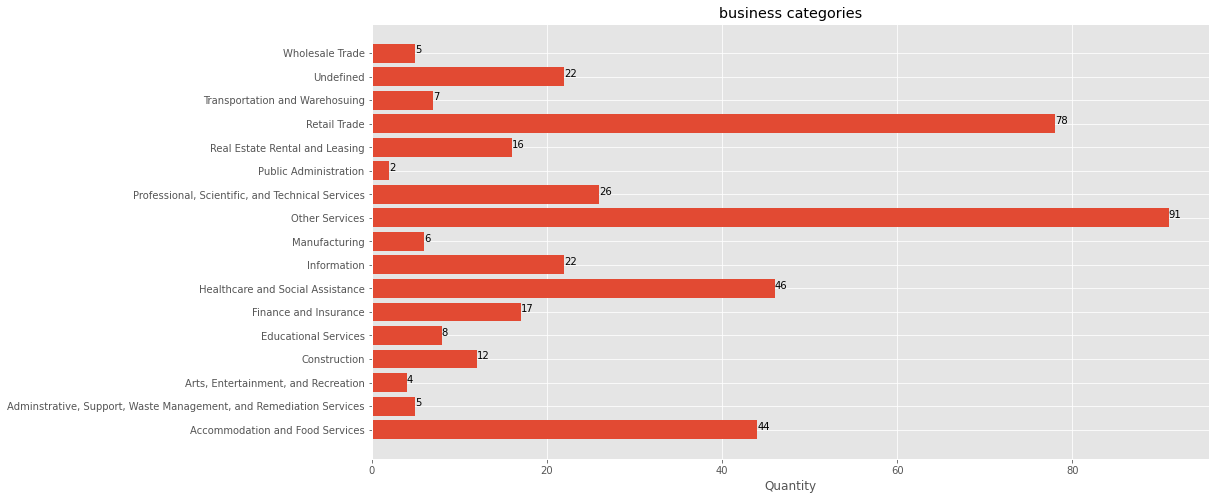

In [ ]:
import matplotlib.pyplot as plt


plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.barh(busi_dist4.index, busi_dist4.values)

for index, value in enumerate(busi_dist4.values):
    plt.text(value, index, str(value))

plt.title('business categories')
plt.xlabel('Quantity')
plt.show()

In [ ]:
import folium
import webbrowser as wb

df_m = df_within4.loc[:,['NAICS_2017_2digit_desc','latitude','longitude']]

map_1=folium.Map(location=[42.364506, -71.038887],zoom_start=12)
df_m.apply(lambda row:folium.Marker(
    location=[row["latitude"], row["longitude"]],
    popup=row["NAICS_2017_2digit_desc"],
    icon=folium.map.Icon(color='green') ).add_to(map_1),axis=1)
map_1.save('map_1.html')